# Sistemas Nebulosos

## Atividade Prática 2 - Inferência Fuzzy

***
### Felipe Bartelt de Assis Pessoa - 2016026841
### Wanderson da Silva Maciel Filho - 2017002660

In [2]:
from plotly.subplots import make_subplots
import numpy as np
import plotly.graph_objects as go
import sys
print('Python version: '+sys.version)
print('Numpy version: '+np.__version__, '\nPlotly version: '+__import__('plotly').__version__)

Python version: 3.10.1 (main, Dec 11 2021, 17:22:55) [GCC 11.1.0]
Numpy version: 1.21.4 
Plotly version: 5.4.0


## Parte 1 - Relações, Composição e Raciocínio Nebuloso

### Questão 1
$$
Q(U,V)=\begin{bmatrix}0 &0.8 &0.6 & 0.25\\0.7&0.98&0.15&0.5\end{bmatrix}\\
L(U,V)=\begin{bmatrix}1 &0.2 &0.6 & 0.8\\0.85&0.3&0.8&0.88\end{bmatrix}\\
R(V,W)=\begin{bmatrix}1 &0.4 &0.2\\0.1&0.4&0.7\\0.4&0.15&0.05\\0.85&0.3&0.1\end{bmatrix}\\
$$

$$
\lnot L(U,V) = 1 -\begin{bmatrix}1 &0.2 &0.6 & 0.8\\0.85&0.3&0.8&0.88\end{bmatrix} = \begin{bmatrix}0 &0.8 &0.4 & 0.2\\0.15&0.7&0.2&0.12\end{bmatrix}\\
M(U,V) = Q(U,V)\ \wedge\ \lnot L(U,V)\\=
\begin{bmatrix}\min(0,0) &\min(0.8,0.8) &\min(0.6,0.4) & \min(0.25,0.2)\\\min(0.7,0.15)&\min(0.98, 0.7)&\min(0.15,0.2)&\min(0.5,0.12)\end{bmatrix}\\
\therefore M(U,V)=\begin{bmatrix}0 &0.8 &0.4 & 0.2\\0.15&0.7&0.15&0.12\end{bmatrix}
$$

$$
P = Q\circ R =\\
\scriptsize
\begin{bmatrix}\max(0\cdot1,0.8\cdot0.1,0.6\cdot0.4,0.25\cdot0.85) &
\max(0\cdot0.4,0.8\cdot0.4,0.6\cdot0.15,0.25\cdot0.3)&
\max(0\cdot0.2,0.8\cdot0.7,0.6\cdot0.05,0.25\cdot0.1)
\\\max(0.7\cdot1,0.98\cdot0.1,0.15\cdot0.4,0.5\cdot0.85)
&\max(0.7\cdot0.4,0.98\cdot0.4,0.15\cdot0.15,0.5\cdot0.3)
&\max(0.7\cdot0.2,0.98\cdot0.7,0.15\cdot0.05,0.5\cdot0.1)
\end{bmatrix}\normalsize\\
\therefore P(U,W) = \begin{bmatrix}0.24 &0.32 &0.56\\0.7&0.392&0.686\end{bmatrix}\\
$$


### Questão 2
$$
\mu_B =\mu_A\circ R= \begin{bmatrix}1&0.5&0.4&0.2\end{bmatrix}\circ
\begin{bmatrix}1&0.8&0&0\\0.8&1&0.8&0\\0&0.8&1&0.8\\0&0&0.8&1\end{bmatrix}=
\begin{bmatrix}1 & 0.8 &0.5 & 0.4 \end{bmatrix}
$$

### Questão 3

$$
\mu_{young}(x) = gaussian(x,0,20)=e^{-\frac{1}{2}\left(\frac{x}{20}\right)^2}\\
\mu_{old}(x) = gaussian(x,100,30)=e^{-\frac{1}{2}\left(\frac{x-100}{30}\right)^2}
$$

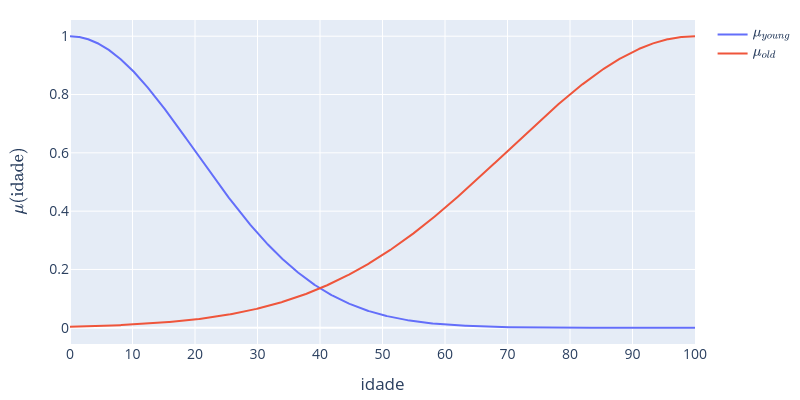

In [16]:
def gaussmf(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

ages = np.linspace(0, 100, 1000)
young = gaussmf(ages, 0, 20)
old = gaussmf(ages, 100, 30)

fig = go.Figure(go.Scatter(x=ages, y=young, name=r'$\mu_{young}$'))
fig.add_scatter(x=ages, y=old, name=r'$\mu_{old}$')
fig.update_layout(margin=dict(b=10,t=20,r=100,l=70), font_size=14, 
                  xaxis_title='idade', yaxis_title=r'$\mu(\text{idade})$',
                  xaxis_dtick=10)
fig.show(renderer='png', width=800, height=400);

### Questão 4

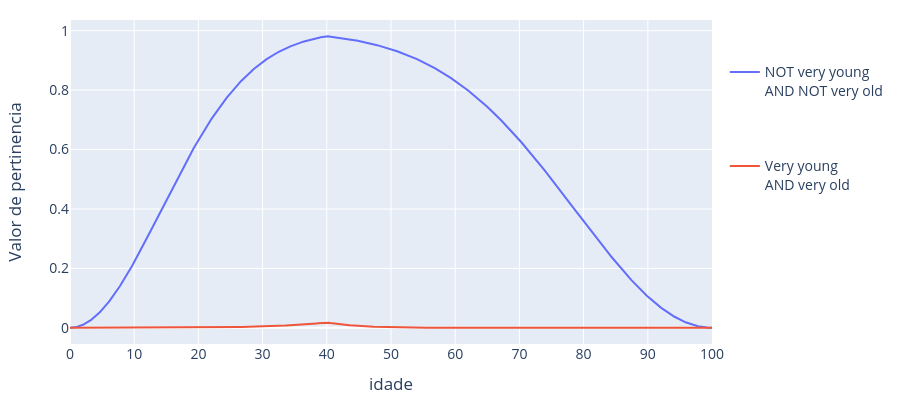

In [17]:
very_old = old**2
very_young = young**2
not_vyoung_n_not_vold = np.minimum(1-very_old, 1-very_young)
vyoung_n_vold = np.minimum(very_old, very_young)

fig = go.Figure(go.Scatter(x=ages, y=not_vyoung_n_not_vold, name='<br></br>NOT very young <br>AND NOT very old</br>'))
fig.add_scatter(x=ages, y=vyoung_n_vold, name='<br></br>Very young <br>AND very old</br>')
fig.update_layout(margin=dict(b=10,t=20,r=100,l=70), font_size=14, 
                  xaxis_title='idade', yaxis_title='Valor de pertinencia',
                  xaxis_dtick=10)
fig.show(renderer='png', width=900, height=400);

### Questão 5
$$
B' = A'\circ R = A'\circ (A\to B)\\
\implies \mu_{B'} = \min\left(\max\left(\min(\mu_{A'}(x), \mu_A(x))\right),\mu_B(y)\right) = \min(w,\mu_B(y))\\
A_1 = 0.2/ x_1 + 0.4/x_2 + 0.5/x_3\\
A_2 = 1/ x_1 + 1/x_2 + 0.3/x_3\\
B_1 = 0.1/ y_1 + 0.3/y_2\\
B_2 = 0.6/ y_1 + 0.2/y_2\\
A' = 0/ x_1 + 1/x_2 +0/x_3\\
$$

$$
\mu_{R_1} = \begin{bmatrix} 0.1 & 0.2 \\ 0.1 & 0.3 \\ 0.1 & 0.3\end{bmatrix}\\
\mu_{R_2} = \begin{bmatrix} 0.6 & 0.2 \\ 0.6 & 0.2 \\ 0.3 & 0.2\end{bmatrix}\\
\mu_{A'} = \begin{bmatrix} 0&1&0\end{bmatrix}
\\
\mu_{B'} = \max\left((\mu_{A'}\circ \mu_{R_1}), (\mu_{A'}\circ \mu_{R_2})\right)\\
\mu_{A'}\circ \mu_{R_1} = \begin{bmatrix} \max(0,0.1,0)&\max(0,0.3,0)\end{bmatrix}=\begin{bmatrix}0.1 & 0.3\end{bmatrix}\\
\mu_{A'}\circ \mu_{R_2} = \begin{bmatrix} \max(0,0.6,0)&\max(0,0.2,0)\end{bmatrix}=\begin{bmatrix}0.6 & 0.2\end{bmatrix}\\
\therefore \mu_{B'} = \max(\begin{bmatrix}0.1 & 0.3\end{bmatrix}, \begin{bmatrix}0.6 & 0.2\end{bmatrix}) = \begin{bmatrix}0.6&0.3\end{bmatrix}\\
\implies B' = 0.6/y_1 + 0.3/y_2
$$


### Questão 6
$$
w_{A_1} = \max\left(\min(\mu_{A'},\mu_{A_1})\right) = \max(0,0.4,0)=0.4=w_1\\
w_{A_2} = \max\left(\min(\mu_{A'},\mu_{A_2})\right) = \max(0,1,0)=1=w_2\\
\implies \mu_{B_1'} = \min(w_1, \mu_{B_1} )
$$

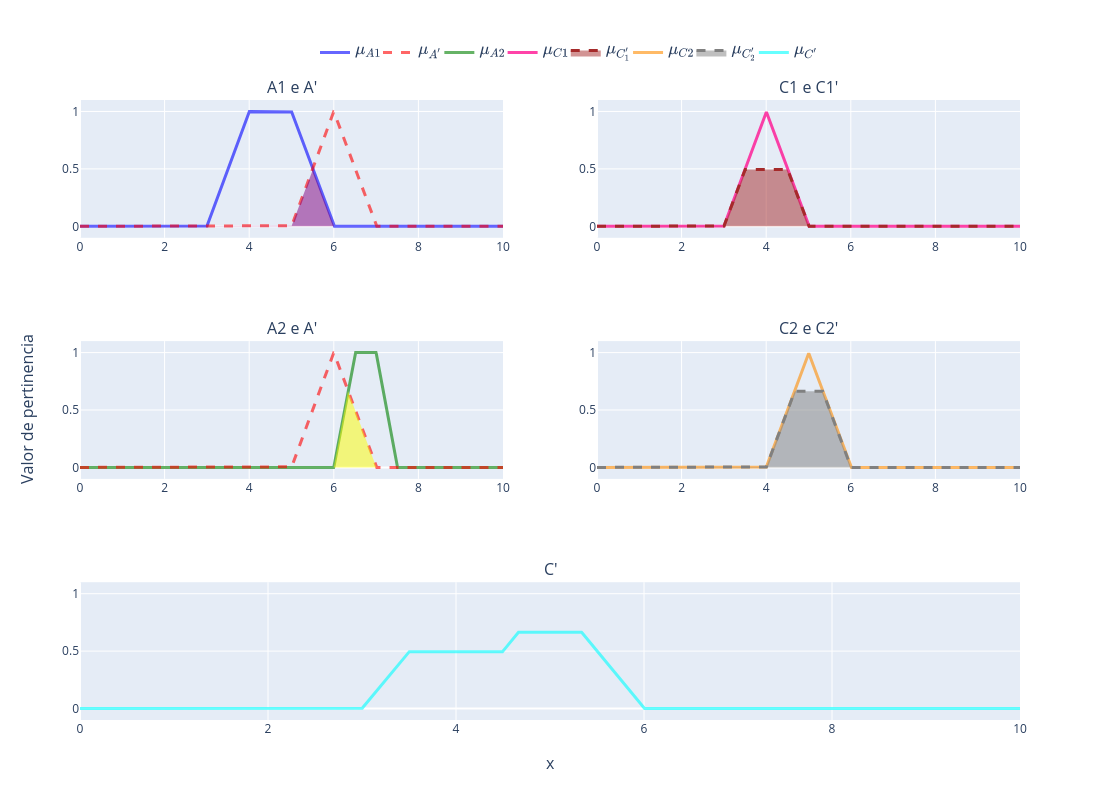

In [103]:
def trimf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def trapmf(x, a, b, c, d):
    min1 = np.minimum((x - a) / (b - a), (d - x) / (d - c))
    return np.maximum(np.minimum(min1, 1), 0)

x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)
mu_A1 = trapmf(x, 3, 4, 5, 6)
mu_A2 = trapmf(x, 6, 6.5, 7, 7.5)
mu_C1 = trimf(y, 3, 4, 5)
mu_C2 = trimf(y, 4, 5, 6)
mu_A_ = trimf(x, 5, 6, 7)
w1 = np.minimum(mu_A1, mu_A_)
w2 = np.minimum(mu_A2, mu_A_)

mu_C1_ = np.minimum(np.max(w1), mu_C1)
mu_C2_ = np.minimum(np.max(w2), mu_C2)
mu_C_ = np.maximum(mu_C1_, mu_C2_)

fig = make_subplots(rows=3, cols=2, 
                    specs=[[{}, {}], [{}, {}],[{"rowspan": 1, "colspan": 2}, None]],
                    subplot_titles=("A1 e A'", "C1 e C1'", "A2 e A'", "C2 e C2'", "C'"),
                    x_title='x', y_title='Valor de pertinencia')
fig.add_scatter(x=x, y=mu_A1, name=r'$\mu_{A1}$', opacity=0.6, mode='lines', line_width=3, row=1, col=1, marker_color='blue')
fig.add_scatter(x=x, y=mu_A_, name=r"$\mu_{A'}$", opacity=0.6, mode='lines', line_width=3, row=1, col=1, marker_color='red', line_dash='dash')
fig.add_scatter(x=x, y=w1, name=r"$w_1$", opacity=0.6, mode='lines', row=1, col=1, fill='tozeroy', line_width=0, line_color='purple',showlegend=False)
fig.add_scatter(x=x, y=mu_A2, name=r'$\mu_{A2}$', opacity=0.6, mode='lines', line_width=3, row=2, col=1, marker_color='green')
fig.add_scatter(x=x, y=mu_A_, name=r"$\mu_{A'}$", opacity=0.6, mode='lines', line_width=3, row=2, col=1, marker_color='red', showlegend=False, line_dash='dash')
fig.add_scatter(x=x, y=w2, name=r"$w_2$", opacity=0.6, mode='lines', row=2, col=1, fill='tozeroy', line_width=0, line_color='yellow',showlegend=False)

fig.add_scatter(x=x, y=mu_C1, name=r'$\mu_{C1}$', opacity=0.8, mode='lines', line_width=3, row=1, col=2, marker_color='deeppink')
fig.add_scatter(x=x, y=mu_C1_, name=r"$\mu_{C_1'}$", opacity=0.4, mode='lines', line_width=3, row=1, col=2, marker_color='brown', fill='tozeroy',line_dash='dash')
fig.add_scatter(x=x, y=mu_C2, name=r'$\mu_{C2}$', opacity=0.6, mode='lines', line_width=3, row=2, col=2, marker_color='darkorange')
fig.add_scatter(x=x, y=mu_C2_, name=r"$\mu_{C_2'}$", opacity=0.6, mode='lines', line_width=3, row=2, col=2, marker_color='gray', fill='tozeroy', line_dash='dash')

fig.add_scatter(x=x, y=mu_C_, name=r"$\mu_{C'}$", opacity=0.6, mode='lines', line_width=3, row=3, col=1, marker_color='cyan')

fig.update_layout(legend=dict(font_size=16, orientation="h", y=1.1, x=0.25))
fig.update_yaxes(range=[-0.1,1.1])
fig.show(renderer='png', width=1100, height=800)


## Parte 2 - Inferência Fuzzy

### Questão 2

$$
y = \cos(x),\ -\frac{\pi}{2}\le x \le \frac{3}{2}
$$

Regras:
- Se $x$ é $A_1$, então $f(x)=p_1x+q_1$

- Se $x$ é $A_2$, então $f(x)=p_2x+q_2$

- Se $x$ é $A_3$, então $f(x)=p_2x+q_3$

Então $A_1 = \text{trimf}\left(x, \left[-\frac{\pi}{2},\ 0,\ \frac{\pi}{2}\right]\right)$, $A_2 = \text{trimf}\left(x, \left[0,\ \frac{\pi}{2},\ \pi\right]\right)$, $A_3 = \text{trimf}\left(x, \left[\frac{\pi}{2},\ \pi,\ \frac{3\pi}{2}\right]\right)$

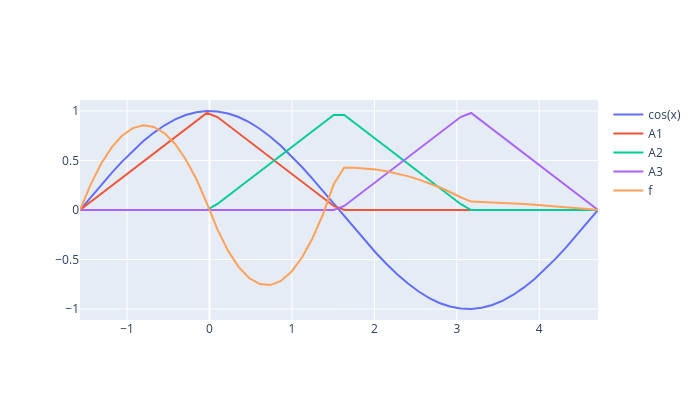

In [182]:
x = np.linspace(-np.pi/2, 3*np.pi/2)
y = np.cos(x)
A1 = trimf(x, -np.pi/2, 0, np.pi/2)
A2 = trimf(x, 0, np.pi/2, np.pi)
A3 = trimf(x, np.pi/2, np.pi, 3*np.pi/2)

f1 = (-80*x*A1 + 10*x*A2 + x*A3) / np.sum([A1, A2, A3])
fig = go.Figure(go.Scatter(x=x,y=y, name='cos(x)'))
fig.add_scatter(x=x, y=A1, name='A1')
fig.add_scatter(x=x, y=A2, name='A2')
fig.add_scatter(x=x, y=A3, name='A3')
fig.add_scatter(x=x, y=f1, name='f')
fig.show(renderer= 'png', width=700, height=400)

# Referências
[1]  Jyh-Shing Roger Jang and Chuen-Tsai Sun. 1996. *Neuro-Fuzzy and Soft 
Computing: A Computational Approach to Learning and Machine Intelligence*. 
Prentice-Hall, Inc., Upper Saddle River, NJ, USA.